### Import libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Boston = pd.read_csv(r'C:\Users\draj2\Downloads\Boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [8]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
# Dimension of the dataset
print(np.shape(Boston))

(506, 14)


In [10]:
print(Boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Box plots to understand the distribution and outliers in the data

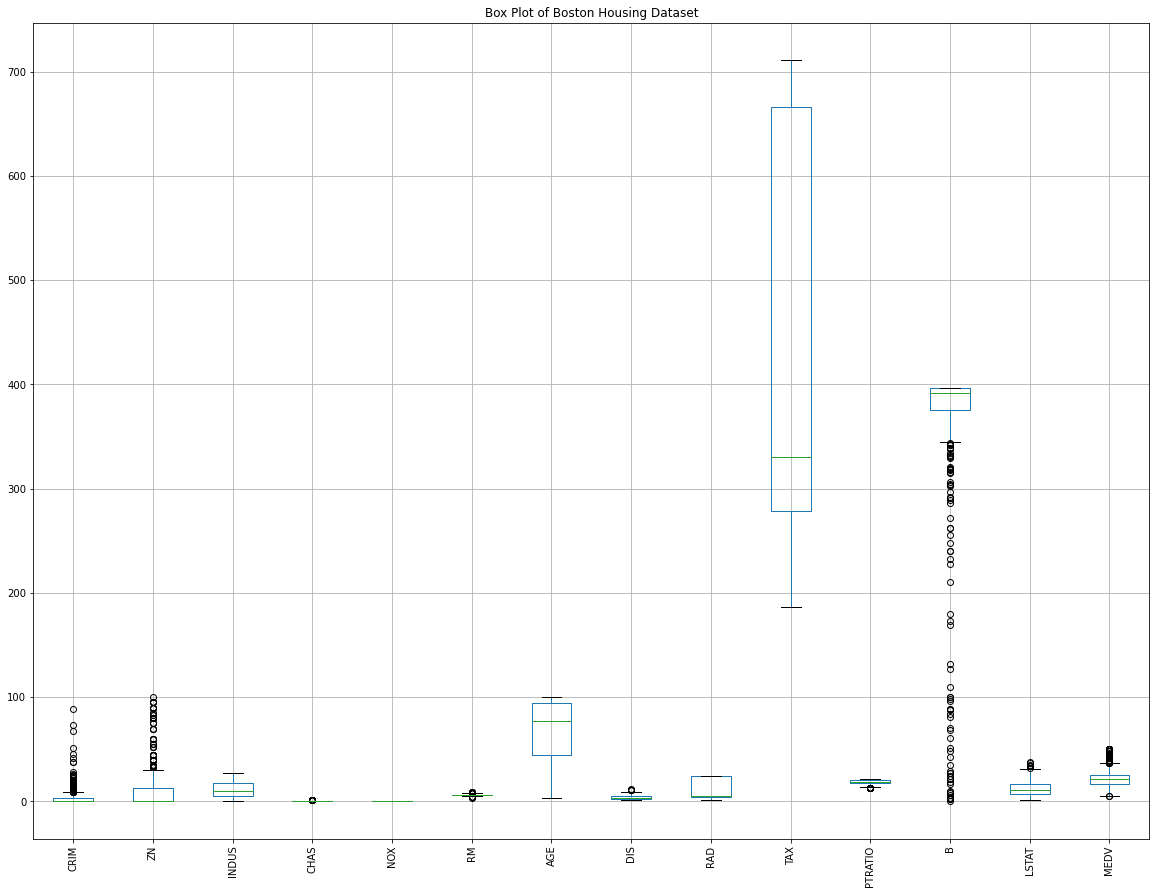

In [11]:
plt.figure(figsize=(20, 15))
Boston.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Boston Housing Dataset')
plt.show()

### Scatter plots to visualize relationships between features and the target variable

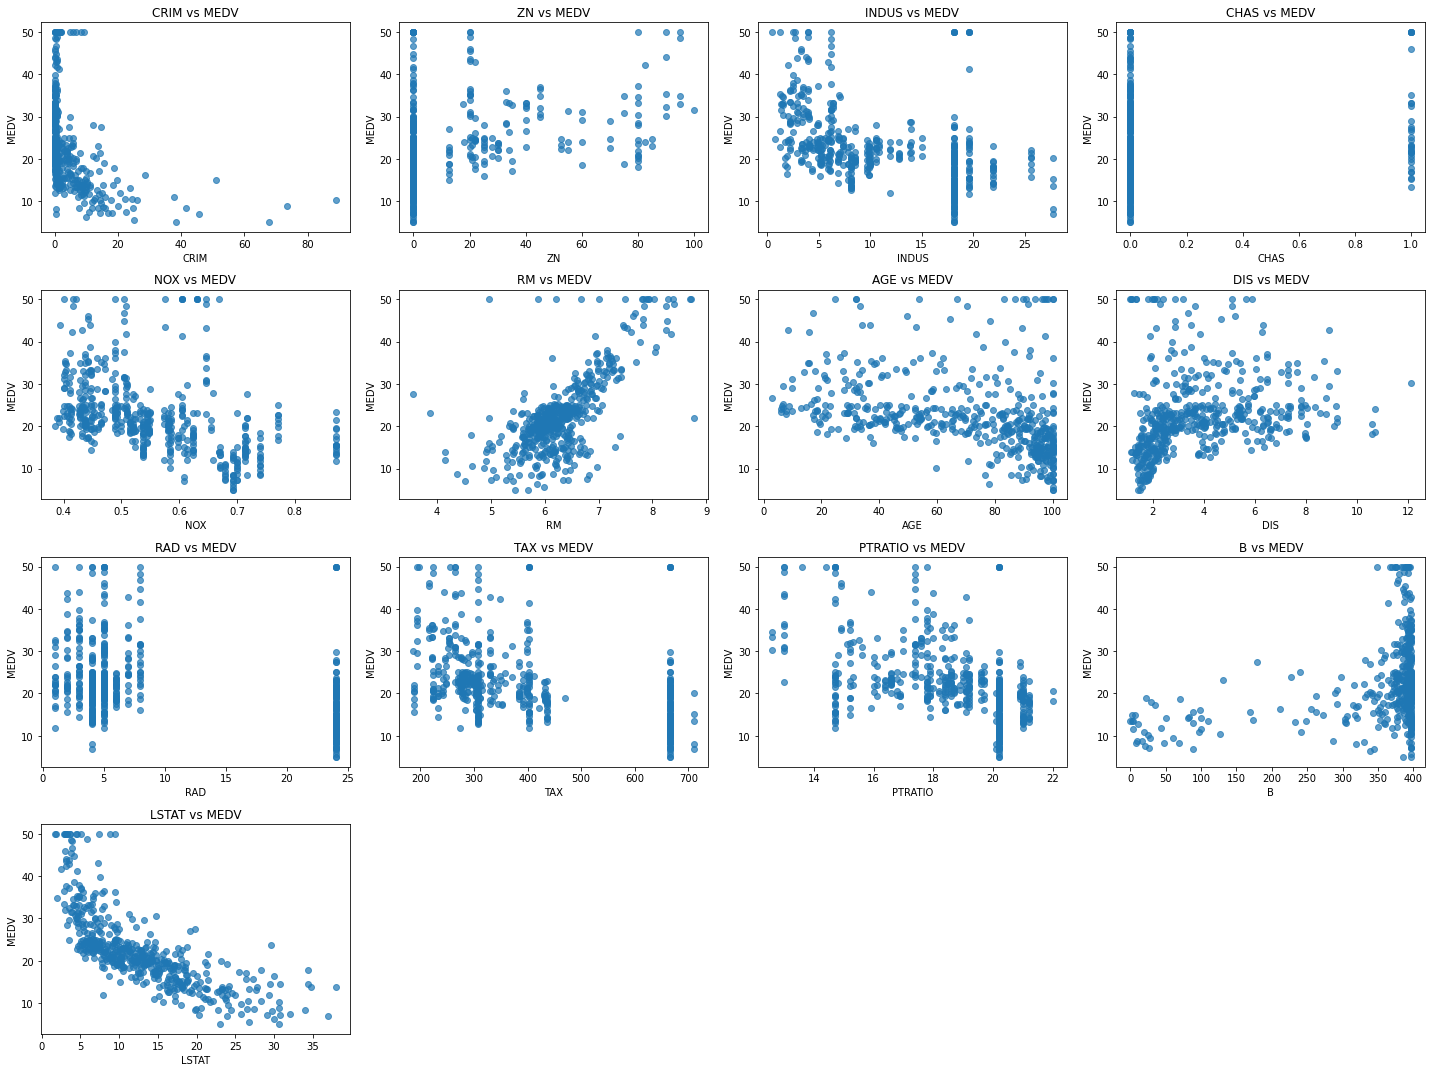

In [12]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(Boston.columns[:-1]):
    plt.subplot(4, 4, i+1)
    plt.scatter(Boston[col], Boston['MEDV'], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'{col} vs MEDV')
plt.tight_layout()
plt.show()

### Linear Regression

In [13]:
# Define the features (X) and target (y)
X = Boston.drop(columns=['MEDV'])
y = Boston['MEDV']

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.291119474973755
R-squared: 0.6687594935356288


### Draw a regression line

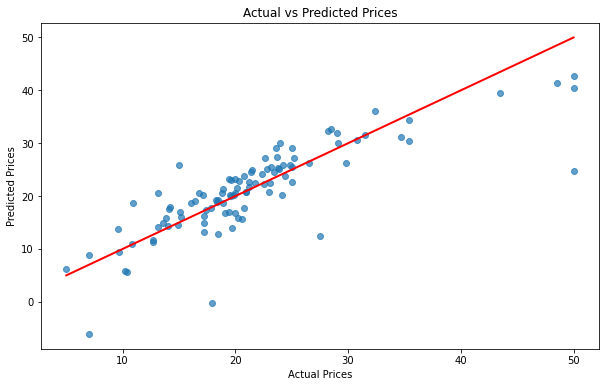

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Box plot of actual vs predicted prices

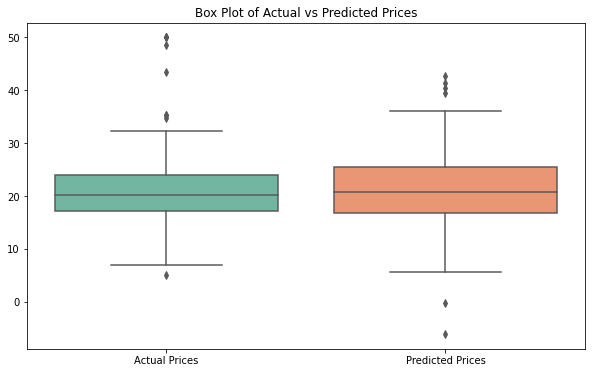

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test, y_pred], palette="Set2")
plt.xticks([0, 1], ['Actual Prices', 'Predicted Prices'])
plt.title('Box Plot of Actual vs Predicted Prices')
plt.show()

### Distribution plot of residuals

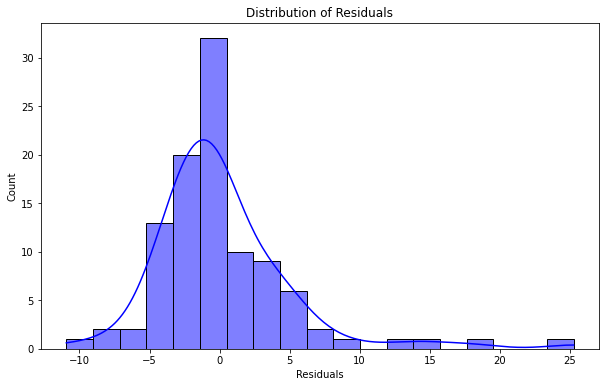

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()